<a href="https://colab.research.google.com/github/LilySu/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [1]:
!pip install graphviz 

In [2]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [0]:
%matplotlib inline
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

def viztree(decision_tree, feature_names):
    """Visualize a decision tree"""
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
7124,50,2400.0,3,1,2.0,3,0,2001,2
4021,33,6500.0,3,65,1.4,3,1,2008,0
3760,67,5800.0,1,161,1.4,3,1,2005,0
4181,50,8500.0,5,630,2.9,0,1,1998,0
5002,23,10800.0,3,130,1.6,3,1,2011,0
6524,5,17700.0,3,98,2.0,3,1,2011,2
8076,77,4700.0,5,342,1.9,0,1,1996,0
7340,67,12800.0,3,118,1.8,3,1,2010,0
516,77,7600.0,5,158,2.0,0,1,2009,0
3974,77,10200.0,3,129,2.0,3,1,2006,0


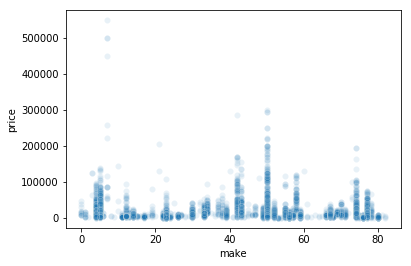

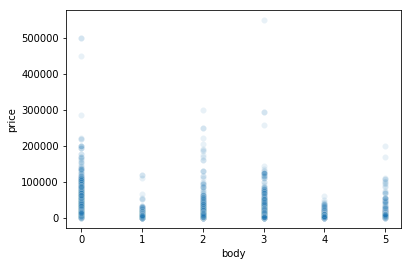

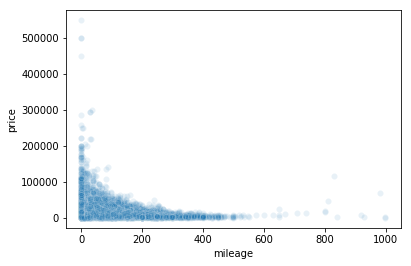

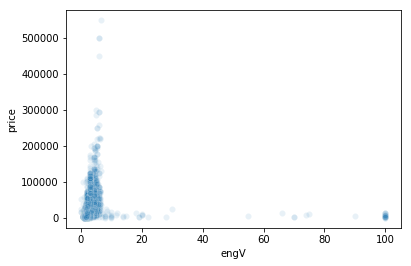

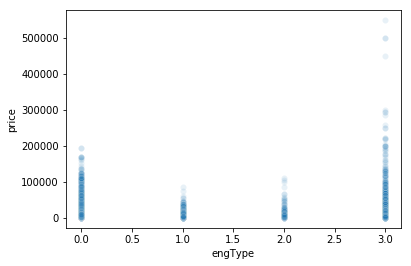

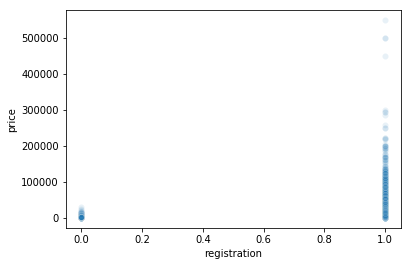

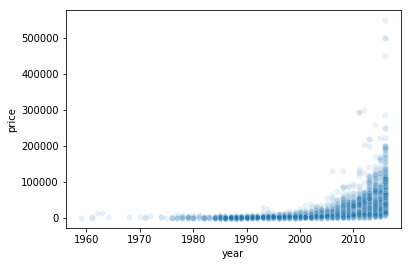

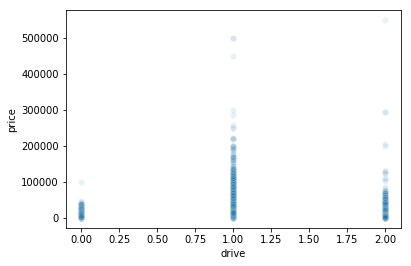

In [5]:
target = 'price'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
feature = 'year'
target='price'

In [0]:
X = df[[feature]]
y = df[target]

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [0]:
def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to TEST target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))#root mean square error, how far we are off by average
    r2 = r2_score(y_test, y_pred)#percentage off target, negative r score means you are doing worse

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)#print intercept
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    

In [0]:
target = 'price'
# features = df.drop(columns = target)
columnstosave = df.select_dtypes(include='number').columns
features = columnstosave.drop([target])

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [51]:
y = df[target]
X = df[features]
run_linear_model(X, y)


Root Mean Squared Error 18834.88159955699
R^2 Score 0.5274349463553321
Intercept 2014353.9221409806
make                5.443710
body              518.552859
mileage           -39.237720
engV               46.680475
engType           135.960618
registration   -12328.907435
year            -1096.041632
drive            -678.496949
ln_price        23587.378453


## 1.5 Use the test data to make predictions.

R^2 0.006923077383502063


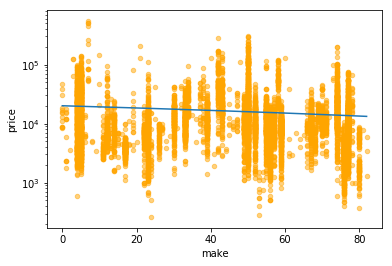

In [53]:
feature = 'make'
df = df.sort_values(by='make')
ax = df.plot(x=feature, y=target, kind='scatter', alpha=0.5, logy=True, color='orange')

X = df[[feature]]
y = df[target] # Apply natural log function to the target
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X) # Apply exponential function (inverse of natural log) to the predictions
ax.plot(X, y_pred) 
print('R^2', model.score(X, y))


In [55]:
y_pred = model.predict(X_test)

    # Compare predictions to TEST target
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))#root mean square error, how far we are off by average
r2 = r2_score(y_test, y_pred)#percentage off target, negative r score means you are doing worse

print('Root Mean Squared Error', rmse)
print('R^2 Score', r2)
print('Intercept', model.intercept_)#print intercept
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

Root Mean Squared Error 165400.20597996912
R^2 Score -35.44247843274029
Intercept 20045.345991875765
year   -82.945136


## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.



*   Root Mean Squared Error 21394.43524600266
*   R^2 Score 0.29213322373743256



## 1.7 How should we interpret the coefficient corresponding to the `year` feature?

For each year, there's an influence in price on average of $1141.00

## 1.8 How should we interpret the Root Mean Square Error?

There is a variation of plus or minus $21394 based on our predictions

## 1.9 How should we interpret the $R^2$?


The fit of this model is 29% accuracy out of a possible 100%. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

In [0]:
X = df[['year']]

R^2 0.48504299195429657


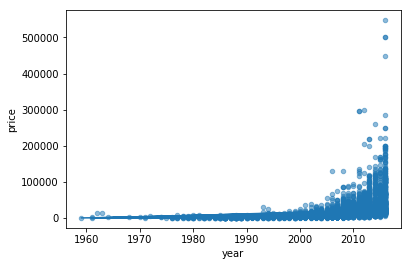

In [14]:
ax = df.plot(x=feature, y=target, kind='scatter', alpha=0.5)
X = df[['year']]
y = df['ln_price'] # Apply natural log function to the target
model = LinearRegression()
model.fit(X, y)
y_pred = np.exp(model.predict(X)) # Apply exponential function (inverse of natural log) to the predictions
ax.plot(X, y_pred) 
print('R^2', model.score(X, y))

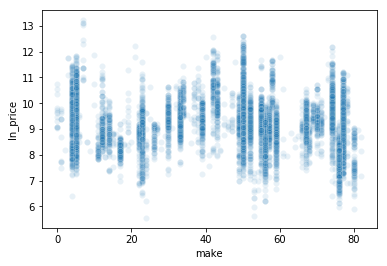

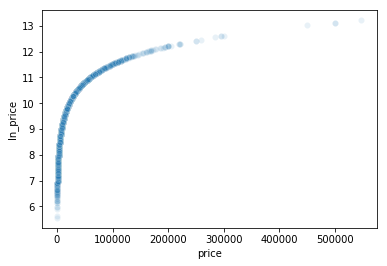

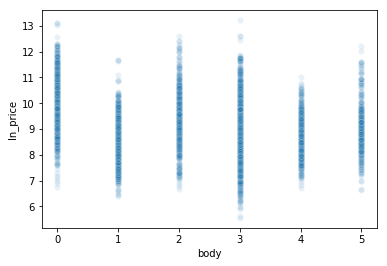

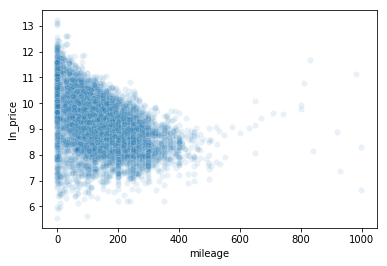

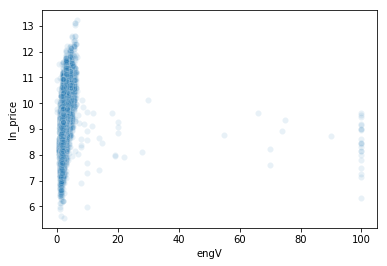

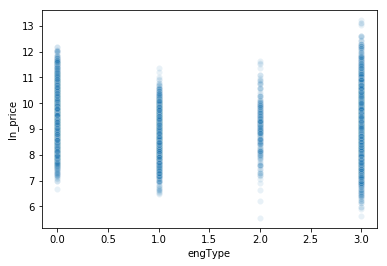

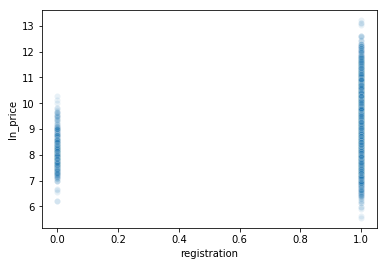

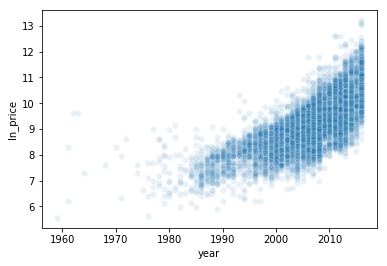

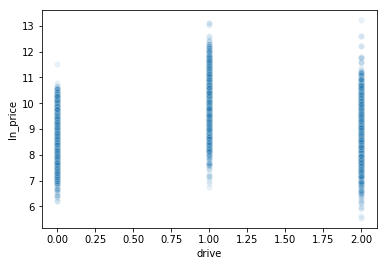

In [15]:
target = 'ln_price'

numberic_columns = numeric_columns.drop('price')
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = np.exp(model.predict(X)) # Apply exponential function (inverse of natural log) to the predictions
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:

ds = df.loc[df['mileage'] > 0]

In [17]:
ds['miles']=df['mileage']*-1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
# X = ds[features]
# y = ds['ln_price']
# columnstosave = ds.select_dtypes(include='number').columns
# X = columnstosave.drop([target])
# # run_linear_model(X, y)
# X

target = 'ln_price'
columnstosave = ds.select_dtypes(include='number').columns
features = columnstosave.drop([target,'mileage','registration','drive','body','price'])
X = ds[features]
y = ds['ln_price']

In [19]:
run_linear_model(X, y)

Root Mean Squared Error 0.6740005612361037
R^2 Score 0.46484275288342203
Intercept -167.9153099513981
make      -0.003414
engV       0.014734
engType   -0.027743
year       0.088381
miles      0.000632


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
Using the Log of our target, we can sufficiently predict the percentage of how far off we are to the target. We are off by the value of the Root Mean Squared Error, 67%. A 1 unit increase in the year will effect sales price by 8%. 

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

R^2 Score 0.30115024428497006


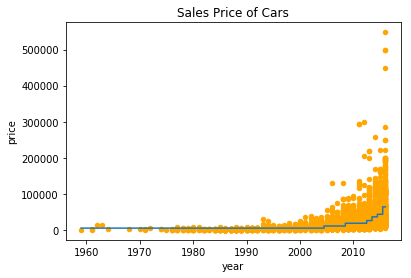

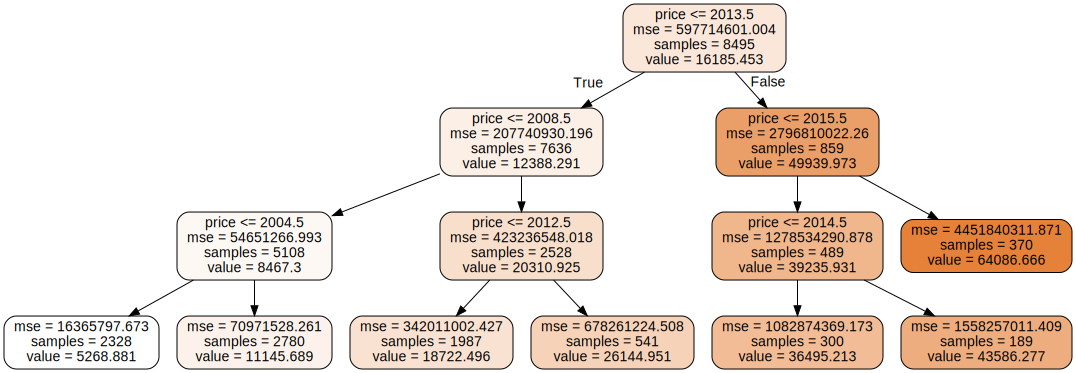

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

putts_X = df[['year']]
putts_y = df['price']


def viztree(decision_tree, feature_names):
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)

def putts_tree(max_depth=1):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(putts_X, putts_y)
    print('R^2 Score', tree.score(putts_X, putts_y))
    ax = df.plot('year', 'price', kind='scatter', title='Sales Price of Cars', color='orange')
    ax.step(putts_X.sort_values(by='year'), tree.predict(putts_X.sort_values(by='year')), where='mid')
    plt.show()
    display(viztree(tree, feature_names=['price']))

putts_tree(max_depth=3);

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

R^2 Score 0.30115024428497006

# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [22]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     972.4
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:36:55   Log-Likelihood:                -8276.4
No. Observations:                8213   AIC:                         1.656e+04
Df Residuals:                    8207   BIC:                         1.661e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -168.0958      3.680    -45.676      0.0

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
No, there are no multicollinearity problems because the Variance Inflation Factors are low, and definitely lower than 10. 

In [23]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      115499.010116
make            1.003628
engV            1.003248
engType         1.104171
year            1.325358
miles           1.415301
dtype: float64